# Linear Regression without placeholder

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'
import time

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
DATA_FILE = 'data/birth_life_2010.txt'

In [3]:
def read_birth_life_data(filename):
    """
    Read in birth_life_2010.txt and return:
    data in the form of NumPy array
    n_samples: number of samples
    """
    text = open(filename, 'r').readlines()[1:]
    data = [line[:-1].split('\t') for line in text]
    births = [float(line[1]) for line in data]
    lifes = [float(line[2]) for line in data]
    data = list(zip(births, lifes))
    print(len(data))
    n_samples = len(data)
    data = np.asarray(data, dtype=np.float32)
    print(data)
    return data, n_samples

In [4]:
# Step 1: read in the data
data, n_samples = read_birth_life_data(DATA_FILE)

# print(data.shape, n_samples)

190
[[ 1.822    74.82825 ]
 [ 3.869    70.81949 ]
 [ 3.911    72.15066 ]
 [ 5.578    61.999855]
 [ 1.579    73.92766 ]
 [ 4.229    67.465195]
 [ 1.15     81.641464]
 [ 3.86     72.30639 ]
 [ 3.142    68.484314]
 [ 3.951    62.44061 ]
 [ 2.16     80.70244 ]
 [ 2.141    76.30168 ]
 [ 2.002    64.662094]
 [ 2.504    68.19498 ]
 [ 3.451    68.76483 ]
 [ 2.635    74.02456 ]
 [ 1.092    80.775314]
 [ 2.747    67.064   ]
 [ 1.22     80.76195 ]
 [ 1.39     82.932686]
 [ 2.117    68.889656]
 [ 1.108    82.87805 ]
 [ 2.47     75.99427 ]
 [ 2.09     75.07688 ]
 [ 2.668    69.22583 ]
 [ 2.022    68.53214 ]
 [ 1.598    73.273094]
 [ 2.581    62.53622 ]
 [ 2.042    77.93202 ]
 [ 1.92     81.69512 ]
 [ 2.499    68.001   ]
 [ 1.94     80.402435]
 [ 1.445    70.27561 ]
 [ 2.399    64.86351 ]
 [ 2.088    73.696655]
 [ 3.297    67.2599  ]
 [ 1.5      82.24634 ]
 [ 1.98     81.45122 ]
 [ 1.39     81.62683 ]
 [ 1.57     79.42195 ]
 [ 1.4      75.1122  ]
 [ 1.4      73.936584]
 [ 1.54     68.80488 ]
 [ 1.38

In [5]:
# Step 2: create Dataset and iterator
dataset = tf.data.Dataset.from_tensor_slices((data[:,0], data[:,1]))

iterator = dataset.make_initializable_iterator()
X, Y = iterator.get_next()

Instructions for updating:
Use `for ... in dataset:` to iterate over a dataset. If using `tf.estimator`, return the `Dataset` object directly from your input function. As a last resort, you can use `tf.compat.v1.data.make_initializable_iterator(dataset)`.


In [6]:
# Step 3: create weight and bias, initialized to 0
w = tf.get_variable('weights', initializer=tf.constant(0.0))
b = tf.get_variable('bias', initializer=tf.constant(0.0))

In [7]:
# Step 4: build model to predict Y
Y_predicted = X * w + b

# Step 5: use the square error as the loss function
loss = tf.square(Y - Y_predicted, name='loss')
# loss = utils.huber_loss(Y, Y_predicted)

# Step 6: using gradient descent with learning rate of 0.001 to minimize loss
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(loss)


In [8]:
start = time.time()
sess = tf.InteractiveSession() #as sess:
# Step 7: initialize the necessary variables, in this case, w and b
sess.run(tf.global_variables_initializer()) 
writer = tf.summary.FileWriter('./graphs/linear_reg', sess.graph)

# Step 8: train the model for 100 epochs
for i in range(100):
    sess.run(iterator.initializer) # initialize the iterator
    total_loss = 0
    try:
        while True:
            _, l = sess.run([optimizer, loss]) 
            total_loss += l
    except tf.errors.OutOfRangeError:
        pass

    print('Epoch {0}: {1}'.format(i, total_loss/n_samples))

# close the writer when you're done using it
writer.close() 

# Step 9: output the values of w and b
w_out, b_out = sess.run([w, b]) 
print('w: %f, b: %f' %(w_out, b_out))
print('Took: %f seconds' %(time.time() - start))

Epoch 0: 1661.863764550287
Epoch 1: 956.3224439573916
Epoch 2: 844.6737683409139
Epoch 3: 750.7312372197838
Epoch 4: 667.659830722252
Epoch 5: 594.1417484349327
Epoch 6: 529.0787271179651
Epoch 7: 471.5003584364135
Epoch 8: 420.5458252520938
Epoch 9: 375.45531067297253
Epoch 10: 335.55436177954664
Epoch 11: 300.24627770512666
Epoch 12: 269.00374521501146
Epoch 13: 241.3595776562824
Epoch 14: 216.9003910217238
Epoch 15: 195.25972397061292
Epoch 16: 176.1137731664483
Epoch 17: 159.17551683403158
Epoch 18: 144.19069889799545
Epoch 19: 130.93503690609023
Epoch 20: 119.20935661137888
Epoch 21: 108.83793506244884
Epoch 22: 99.66458668207358
Epoch 23: 91.55171666162971
Epoch 24: 84.37658985632197
Epoch 25: 78.03213362396008
Epoch 26: 72.42178616552172
Epoch 27: 67.46132107331957
Epoch 28: 63.07563027821873
Epoch 29: 59.19871881428714
Epoch 30: 55.77163058824279
Epoch 31: 52.742706123048954
Epoch 32: 50.06563247971506
Epoch 33: 47.70006537150391
Epoch 34: 45.61017402416389
Epoch 35: 43.7637948

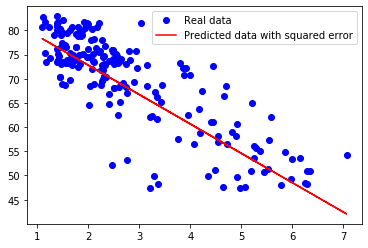

In [9]:
# plot the results
plt.plot(data[:,0], data[:,1], 'bo', label='Real data')
plt.plot(data[:,0], data[:,0] * w_out + b_out, 'r', label='Predicted data with squared error')
# plt.plot(data[:,0], data[:,0] * (-5.883589) + 85.124306, 'g', label='Predicted data with Huber loss')
plt.legend()
plt.show()

# Prediction

In [11]:
# births, lifes = 3.25, 62.286682

# data = list([(births, lifes)])
# data = np.asarray(data, dtype=np.float32)

# dataset = tf.data.Dataset.from_tensor_slices((data[:,0], data[:,1]))
# iterator = dataset.make_initializable_iterator()
# # X, Y = iterator.get_next()

# # tf.assig

# sess.run(iterator.initializer)
# w_out, b_out = sess.run([w, b]) 
# print('w: %f, b: %f' %(w_out, b_out))
# print('Took: %f seconds' %(time.time() - start))

# Y_predicted = sess.run(Y_predicted)
# print(Y_predicted)